<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [25]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [9]:
# Command:
credit_train.isnull().sum()

# One sentance summary:
# This is a pretty powerful command, because it has evaluated and summed up all of the potential null values in each column
# instead of me having to perform a loop on columns.

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

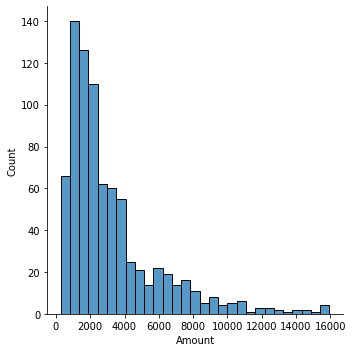

In [13]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
sn.displot(credit_train, x="Amount")

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [26]:
# Command:
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model

regr = linear_model.LogisticRegression()
x = np.array(credit_train['CreditHistory.Critical']).astype(int).reshape((-1, 1))
credit_train['Class'] = credit_train['Class'].eq('Good').mul(1)
y = np.array(credit_train['Class'])

regr.fit(x, y)
y_pred = regr.predict(x)
x = sm.add_constant(x)


results = sm.OLS(y, x).fit()
print(results.summary())

# One sentence summary:
# The r^2 seems low so I imagine this is a bad fit, but I'm not sure if this is a good measurement for this.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     28.94
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           9.81e-08
Time:                        11:27:36   Log-Likelihood:                -505.13
No. Observations:                 808   AIC:                             1014.
Df Residuals:                     806   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.019     34.184      0.0

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [27]:
credit_train['Class'] = credit_train['Class'].eq('Good').mul(1)
credit_train.head()


,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,0,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,0,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,0,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,0,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,0,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [31]:
import numpy as np
from sklearn import linear_model

predictors = credit_train.drop('CreditHistory.Critical', axis=1)
x = np.array(predictors)
y = np.array(credit_train['CreditHistory.Critical'])

logit = linear_model.LogisticRegression(max_iter=20000)
logit.fit(x, y)

# I had to increase max iterations in order for this work. Nothing to be shown here.
# I did find the 'drop' command useful though for all other columns to be included.

LogisticRegression(max_iter=20000)

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [32]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

from IPython.display import display
from sklearn.metrics import confusion_matrix
y_test = credit_test['CreditHistory.Critical']

credit_test['Class'] = credit_test['Class'].eq('Good').mul(1)
x_test = credit_test.drop('CreditHistory.Critical', axis=1)

y_pred = logit.predict(x_test)

confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))


,y_pred=0,y_pred=1,Total
,,,
y=0,121,5,126
y=1,3,63,66
Total,124,68,


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [33]:
# Command that outputs acccuracy
# Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
accuracy = (confusion_mtx[0][0] + confusion_mtx[0][1]) / (confusion_mtx[0][0] + confusion_mtx[0][1] + confusion_mtx[1][0] + confusion_mtx[1][1])
print(accuracy)

0.65625


<h3>Q.7. Generate the ROC curve.</h3>

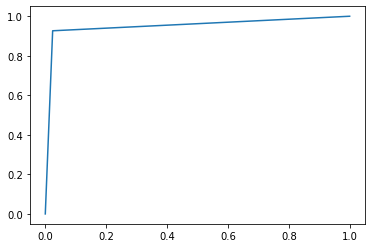

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_pred, y_test)
plt.plot(fpr, tpr)
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [35]:
# Command(s):
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.9574314574314574


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

predictors = credit_train.drop('CreditHistory.Critical', axis=1)
x = np.array(predictors)
y = np.array(credit_train['CreditHistory.Critical'])

lda = LinearDiscriminantAnalysis()
lda.fit(x, y)


<h3>Q.10. What is the accuracy of the new model?</h3>

In [ ]:
y_test = credit_test['CreditHistory.Critical']
credit_test['Class'] = credit_test['Class'].eq('Good').mul(1)
x_test = credit_test.drop('CreditHistory.Critical', axis=1)

y_pred = lda.predict(x_test)

confusion_mtx_2 = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx_2))
print(confusion_mtx_2)
accuracy2 = (confusion_mtx_2[0][0] + confusion_mtx_2[0][1]) / (confusion_mtx_2[0][0] + confusion_mtx_2[0][1] + confusion_mtx_2[1][0] + confusion_mtx_2[1][1])
print(accuracy2)



<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# Learning is definitely continuing. There are so many ways to manipulate data, that it is sometimes difficult
# to figure out which method is best. Every library offers their own take on how to approach various problems.
# One irritating roadblock I spent hours over, was mutating the columns to numerical (Good = 1; Bad = 0).
# The reason why it was irritating was if I ran .mul(1) on the column once, it worked out. But on a subsequent
# run of the codeblock, it would mutate it once again! And this would resolve in having all 0s and removing the
# alternating 1s and 0s to indicate Good/Bad. My only solution was to re-import the data, and run anew.
# The solution to most of my problems that I couldn't figure out was to re-import. This makes me think I may be handling
# the data incorrectly, or this is simply the nature of the beast.
# Regardless, I am EXCITED to see the solutions to the first 3 assignments. Please upload them!